## #01. 방문자수, 업종별 지출액 - 준비작업
### [1] 패키지 가져오기

In [1]:
from pandas import read_excel, DataFrame
from sklearn.impute import SimpleImputer
import numpy as np

import sys
import seaborn as sb
from matplotlib import pyplot as plt
import requests
from IPython.display import SVG
from bs4 import BeautifulSoup

### [2] 데이터 가져오기

In [2]:
origin = read_excel("2023관광내국인.xlsx")
origin.head()

,광역시도,내/외국인,서울&경기/그외,방문자수,총지출액,쇼핑업지출액,숙박업지출액,식음료업지출액,여가서비스업지출액,여행업지출액,운송업지출액
0,서울특별시,내국인,서울&경기,587266491.0,12500198042,3767923067,395404300,6706265830,450304002,105513858,1074786985
1,부산광역시,내국인,그외,148044554.0,3196044818,1295342025,124324366,1572064934,113923117,2195870,88194506
2,대구광역시,내국인,그외,102614956.0,1927833447,888738949,43009369,868102530,82718253,661187,44603159
3,인천광역시,내국인,그외,175109028.0,2013936010,708344757,68774707,1094968276,103238384,330272,38279614
4,광주광역시,내국인,그외,66257320.0,956469146,385806466,16904610,513004715,39660241,594231,498883


In [3]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   광역시도       17 non-null     object 
 1   내/외국인      17 non-null     object 
 2   서울&경기/그외   17 non-null     object 
 3   방문자수       16 non-null     float64
 4   총지출액       17 non-null     int64  
 5   쇼핑업지출액     17 non-null     int64  
 6   숙박업지출액     17 non-null     int64  
 7   식음료업지출액    17 non-null     int64  
 8   여가서비스업지출액  17 non-null     int64  
 9   여행업지출액     17 non-null     int64  
 10  운송업지출액     17 non-null     int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 1.6+ KB


## #02. 방문자수, 업종별 지출액 - 데이터 전처리(정제)
### [1] 결측치 확인 및 처리
- 강원도방문자수 평균값으로 대체

In [4]:
empty = origin.isnull()
empty.sum()

광역시도         0
내/외국인        0
서울&경기/그외     0
방문자수         1
총지출액         0
쇼핑업지출액       0
숙박업지출액       0
식음료업지출액      0
여가서비스업지출액    0
여행업지출액       0
운송업지출액       0
dtype: int64

In [5]:
df = origin.drop(['광역시도', '내/외국인', '서울&경기/그외'], axis=1)

In [6]:
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr

SimpleImputer()

In [7]:
df_imr = imr.fit_transform(df.values)
df_imr

array([[5.87266491e+08, 1.25001980e+10, 3.76792307e+09, 3.95404300e+08,
        6.70626583e+09, 4.50304002e+08, 1.05513858e+08, 1.07478698e+09],
       [1.48044554e+08, 3.19604482e+09, 1.29534202e+09, 1.24324366e+08,
        1.57206493e+09, 1.13923117e+08, 2.19587000e+06, 8.81945060e+07],
       [1.02614956e+08, 1.92783345e+09, 8.88738949e+08, 4.30093690e+07,
        8.68102530e+08, 8.27182530e+07, 6.61187000e+05, 4.46031590e+07],
       [1.75109028e+08, 2.01393601e+09, 7.08344757e+08, 6.87747070e+07,
        1.09496828e+09, 1.03238384e+08, 3.30272000e+05, 3.82796140e+07],
       [6.62573200e+07, 9.56469146e+08, 3.85806466e+08, 1.69046100e+07,
        5.13004715e+08, 3.96602410e+07, 5.94231000e+05, 4.98883000e+05],
       [8.20093400e+07, 1.72143246e+09, 4.55979766e+08, 2.11212480e+07,
        4.98375948e+08, 2.73388580e+07, 1.66183000e+05, 7.18450455e+08],
       [4.90320320e+07, 5.73540448e+08, 1.49073201e+08, 1.79045380e+07,
        3.64185079e+08, 4.17483360e+07, 1.93475000e+05, 4.

In [8]:
re_df = DataFrame(df_imr, index=df.index, columns=df.columns)
re_df.describe()

,방문자수,총지출액,쇼핑업지출액,숙박업지출액,식음료업지출액,여가서비스업지출액,여행업지출액,운송업지출액
count,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01
mean,1.727014e+08,2.464812e+09,7.728993e+08,9.221374e+07,1.286705e+09,1.763226e+08,7.211872e+06,1.294598e+08
std,1.703816e+08,3.347984e+09,1.129344e+09,9.693870e+07,1.756532e+09,2.179450e+08,2.537476e+07,2.983331e+08
min,2.740505e+07,1.049468e+08,1.702359e+07,2.554440e+06,7.209499e+07,1.324867e+07,4.282000e+03,2.085700e+04
25%,8.200934e+07,9.971358e+08,1.807876e+08,3.864026e+07,4.983759e+08,7.446961e+07,2.397510e+05,1.231491e+06
50%,1.284271e+08,1.284656e+09,3.083020e+08,6.531668e+07,7.474988e+08,1.032384e+08,4.052930e+05,1.936850e+06
75%,1.727014e+08,1.927833e+09,7.083448e+08,1.243244e+08,9.182516e+08,1.955977e+08,2.195870e+06,8.632905e+07
max,6.273664e+08,1.250020e+10,3.767923e+09,3.954043e+08,6.706266e+09,9.211982e+08,1.055139e+08,1.074787e+09


### [2] 방문자수, 지출액 > 천명, 백만원 단위로 변경

In [9]:
df2 = origin[['광역시도', '내/외국인', '서울&경기/그외']]

for i, v in enumerate(re_df.columns):
    df2[v] = re_df[v].divide(1000)

/var/folders/7s/11f9ngv16yd4rmc74hx3y3w80000gp/T/ipykernel_79924/3668310395.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[v] = re_df[v].divide(1000)
/var/folders/7s/11f9ngv16yd4rmc74hx3y3w80000gp/T/ipykernel_79924/3668310395.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[v] = re_df[v].divide(1000)
/var/folders/7s/11f9ngv16yd4rmc74hx3y3w80000gp/T/ipykernel_79924/3668310395.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

### [3] 데이터 타입 변경

In [10]:
df2= df2.astype({'광역시도' : 'category', '내/외국인' : 'category', '서울&경기/그외' : 'category'})
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   광역시도       17 non-null     category
 1   내/외국인      17 non-null     category
 2   서울&경기/그외   17 non-null     category
 3   방문자수       17 non-null     float64 
 4   총지출액       17 non-null     float64 
 5   쇼핑업지출액     17 non-null     float64 
 6   숙박업지출액     17 non-null     float64 
 7   식음료업지출액    17 non-null     float64 
 8   여가서비스업지출액  17 non-null     float64 
 9   여행업지출액     17 non-null     float64 
 10  운송업지출액     17 non-null     float64 
dtypes: category(3), float64(8)
memory usage: 2.2 KB


### [4] 기술통계량 확인

In [27]:
df2.describe()

,방문자수,총지출액,쇼핑업지출액,숙박업지출액,식음료업지출액,여가서비스업지출액,여행업지출액,운송업지출액
count,17.000000,1.700000e+01,1.700000e+01,17.000000,1.700000e+01,17.000000,17.000000,1.700000e+01
mean,172701.368938,2.464812e+06,7.728993e+05,92213.737824,1.286705e+06,176322.551235,7211.871706,1.294598e+05
std,170381.629333,3.347984e+06,1.129344e+06,96938.696270,1.756532e+06,217944.957197,25374.759706,2.983331e+05
min,27405.046000,1.049468e+05,1.702359e+04,2554.440000,7.209499e+04,13248.673000,4.282000,2.085700e+01
25%,82009.340000,9.971358e+05,1.807876e+05,38640.260000,4.983759e+05,74469.610000,239.751000,1.231491e+03
50%,128427.117000,1.284656e+06,3.083020e+05,65316.675000,7.474988e+05,103238.384000,405.293000,1.936850e+03
75%,172701.368937,1.927833e+06,7.083448e+05,124324.366000,9.182516e+05,195597.708000,2195.870000,8.632905e+04
max,627366.383000,1.250020e+07,3.767923e+06,395404.300000,6.706266e+06,921198.160000,105513.858000,1.074787e+06


## #03. 방문자수, 업종별 지출액 - 데이터 시각화
### [1] 방문자수 분포

In [12]:
plt.rcParams['font.family'] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 200

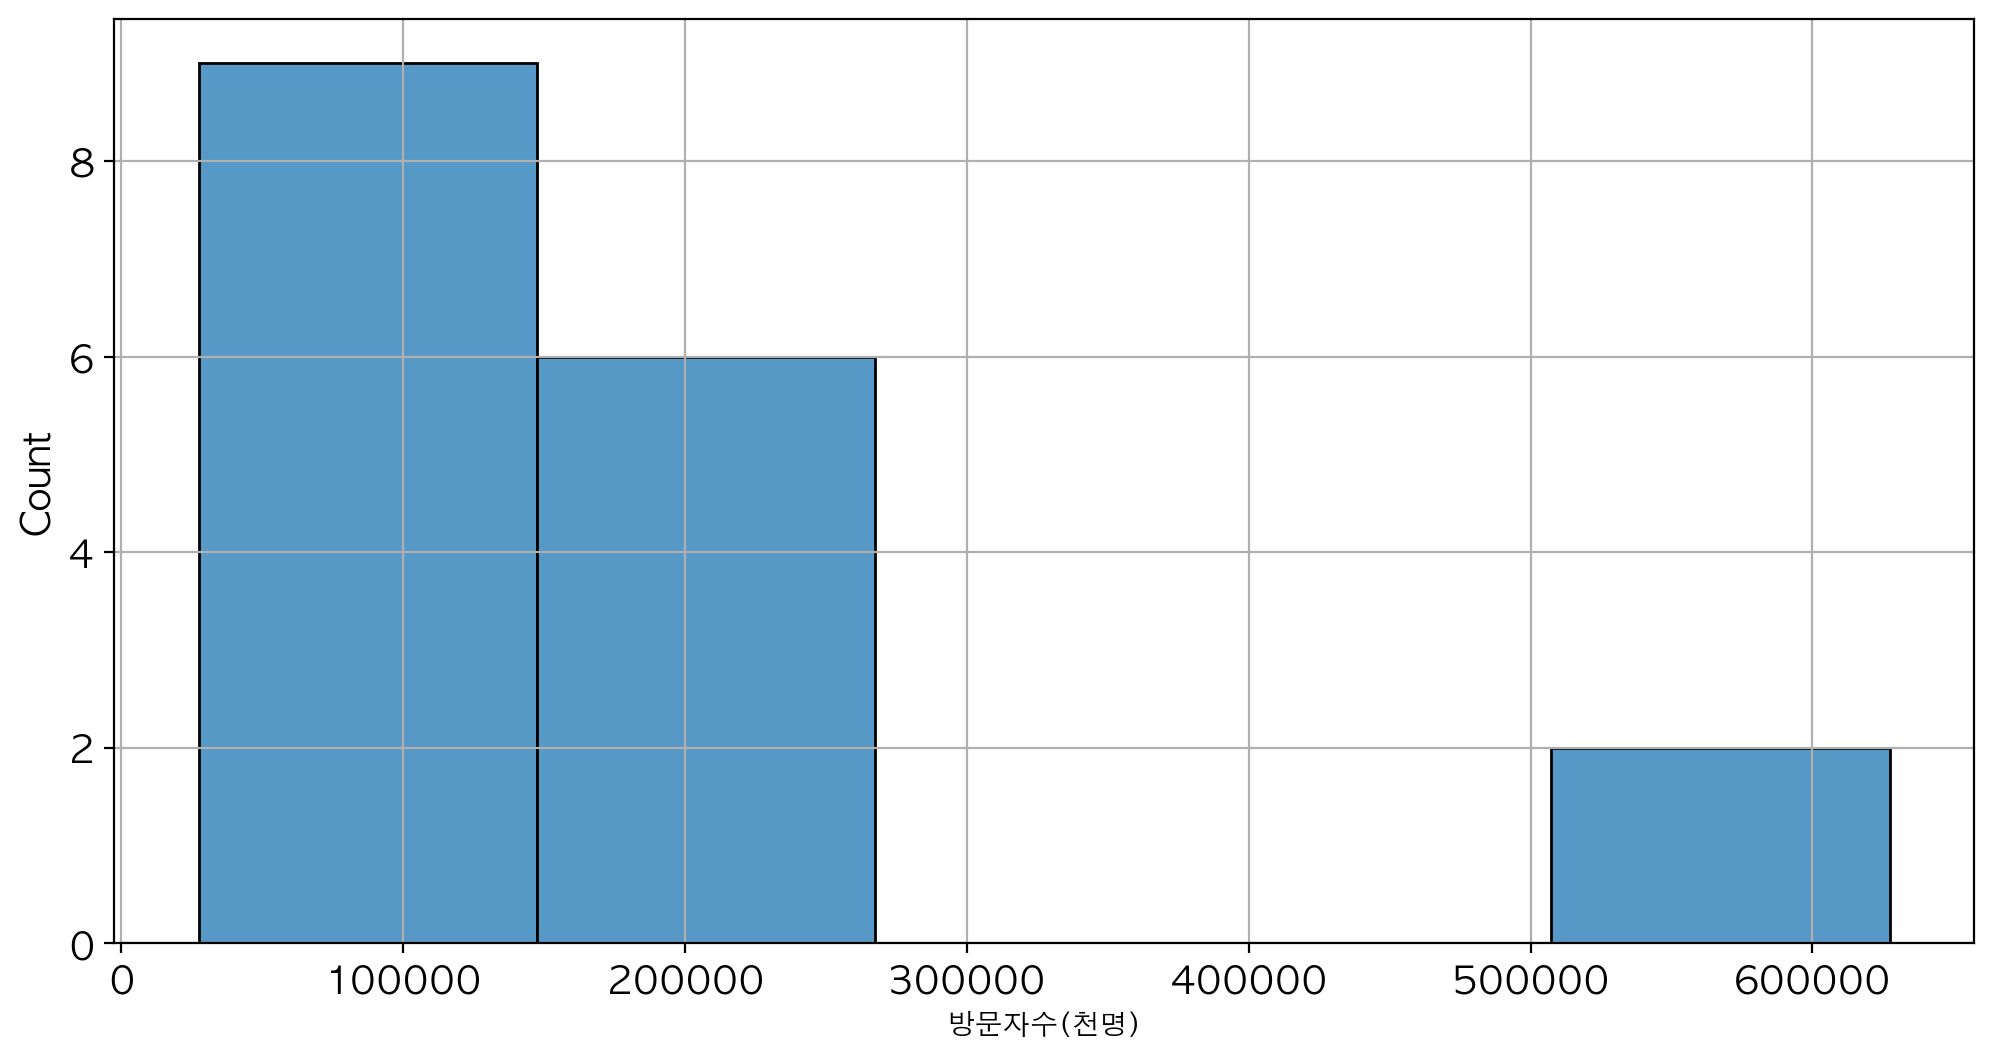

In [13]:
plt.figure()
sb.histplot(data=df2, x = '방문자수', bins=5)
plt.grid()
#plt.title('방문자수 히스토그램')
plt.xlabel('방문자수(천명)', fontdict={'size':10})
plt.show()
plt.close()

In [14]:
hist, bins = np.histogram(df2['방문자수'],5)
print('구간별데이터수(리스트):', hist)
print('구간경계(리스트):', bins)

구간별데이터수(리스트): [9 6 0 0 2]
구간경계(리스트): [ 27405.046  147397.3134 267389.5808 387381.8482 507374.1156 627366.383 ]


In [15]:
#전국지도 시각화

In [16]:
df_map = df2[['방문자수']]
df_map['두글자']= ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주']
df_map= df_map.set_index('두글자')
df_map


/var/folders/7s/11f9ngv16yd4rmc74hx3y3w80000gp/T/ipykernel_79924/3911099216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_map['두글자']= ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남',


,방문자수
두글자,
서울,587266.491000
부산,148044.554000
대구,102614.956000
인천,175109.028000
광주,66257.320000
대전,82009.340000
울산,49032.032000
세종,27405.046000
경기,627366.383000


In [17]:
session = requests.Session()
r=session.get('https://data.hossam.kr/gisdata/map_sido.svg')

if r.status_code != 200:
    errmsg = '%d %s에러 발생' % (r.status_code, r.reason)
    raise Exception(errmsg)

map_svg = r.text
#SVG(map_svg)

In [18]:
colors = ['#c5cbdd','#7d89ae','#48578f','#39457b','#272c56']
soup = BeautifulSoup(map_svg)
path_list = soup.select('path[name]')
#print(len(path_list))

/var/folders/7s/11f9ngv16yd4rmc74hx3y3w80000gp/T/ipykernel_79924/2090378398.py:2: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup(map_svg)


In [19]:
for p in path_list:
    지역명 = p['name']
    인구수 = df_map.loc[지역명, '방문자수']
    #print(지역명, 인구수)

    for i, v in enumerate([27405.046,  147397.3134, 267389.5808, 387381.8482, 507374.1156, 627366.383 ]):
        if i==0:
            continue
        if 인구수 <= v:
            color_index = i-1
            break
    p['fill'] = colors[color_index]

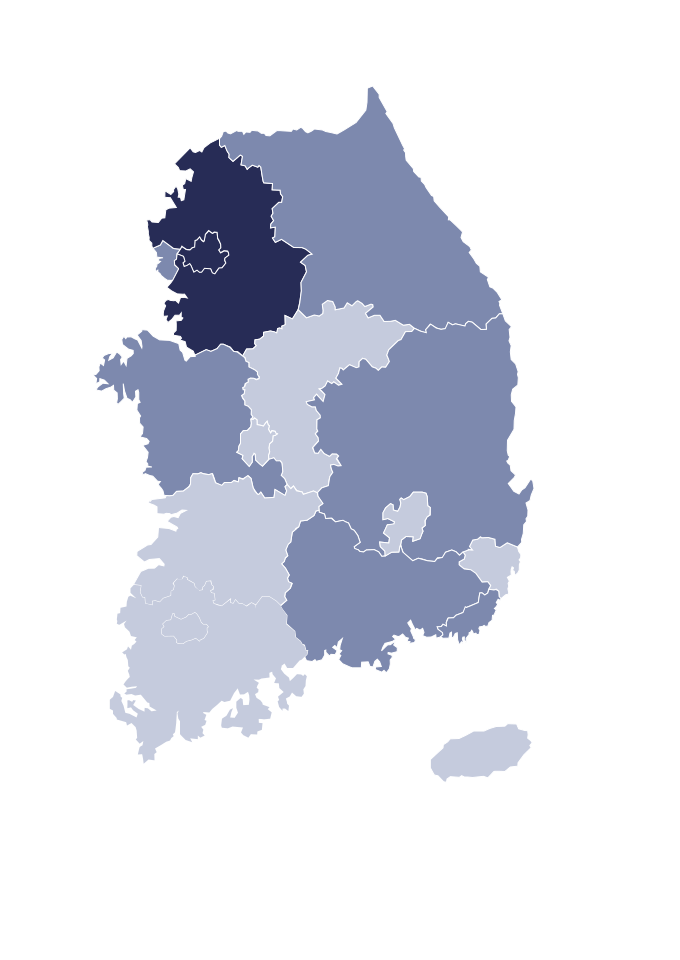

In [20]:
new_svg = soup.prettify()
SVG(new_svg)

### [2] 관광 업종별 지출액 

In [21]:
df3 = DataFrame(df2[['쇼핑업지출액', '숙박업지출액', '식음료업지출액','여가서비스업지출액', '여행업지출액', '운송업지출액']])

합계 = []
for i, v in enumerate(df3.columns):
    합계.append(df3[v].sum(axis=0))

df3.loc['합계'] = 합계

dfa= df3.loc['합계'].T
dfa

쇼핑업지출액       1.313929e+07
숙박업지출액       1.567634e+06
식음료업지출액      2.187398e+07
여가서비스업지출액    2.997483e+06
여행업지출액       1.226018e+05
운송업지출액       2.200816e+06
Name: 합계, dtype: float64

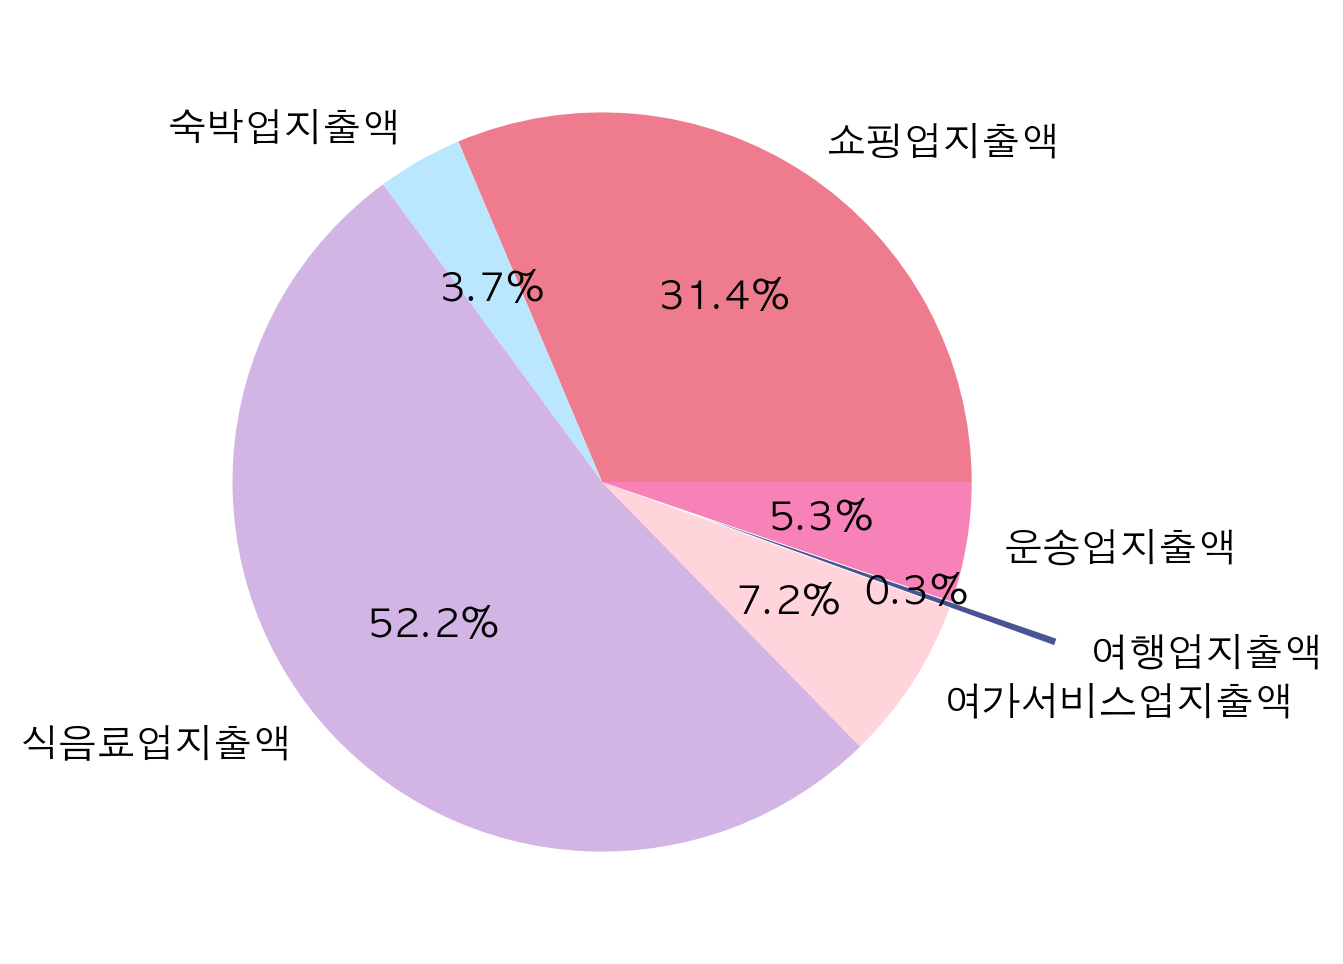

In [22]:
dfa.plot.pie(autopct='%0.1f%%', colors = ['#EF7C8E', '#BBE7FE', '#D3B5E5', '#FFD4DB', '#4a5396', '#f682b8'],
        explode = [0,0,0,0,0.3,0], startangle=0) #해당칼럼명이 ylabel이 됨
plt.ylabel('')
plt.show()
plt.close()

In [23]:
df_heat = df2.sort_values('광역시도', ascending=True)
df_heat= df_heat.set_index('광역시도')
df_heat =df_heat[['쇼핑업지출액', '숙박업지출액',	'식음료업지출액','여가서비스업지출액','여행업지출액','운송업지출액']]
df_heat

,쇼핑업지출액,숙박업지출액,식음료업지출액,여가서비스업지출액,여행업지출액,운송업지출액
광역시도,,,,,,
강원도,165251.917,202349.561,747498.758,214294.508,2674.231,1231.491
경기도,3536262.778,172443.789,4873005.888,921198.160,2381.820,137520.563
경상남도,386097.024,64615.535,918251.586,202289.036,366.195,1936.850
경상북도,228347.930,72019.299,786647.328,195597.708,405.293,1638.492
광주광역시,385806.466,16904.610,513004.715,39660.241,594.231,498.883
대구광역시,888738.949,43009.369,868102.530,82718.253,661.187,44603.159
대전광역시,455979.766,21121.248,498375.948,27338.858,166.183,718450.455
부산광역시,1295342.025,124324.366,1572064.934,113923.117,2195.870,88194.506
서울특별시,3767923.067,395404.300,6706265.830,450304.002,105513.858,1074786.985


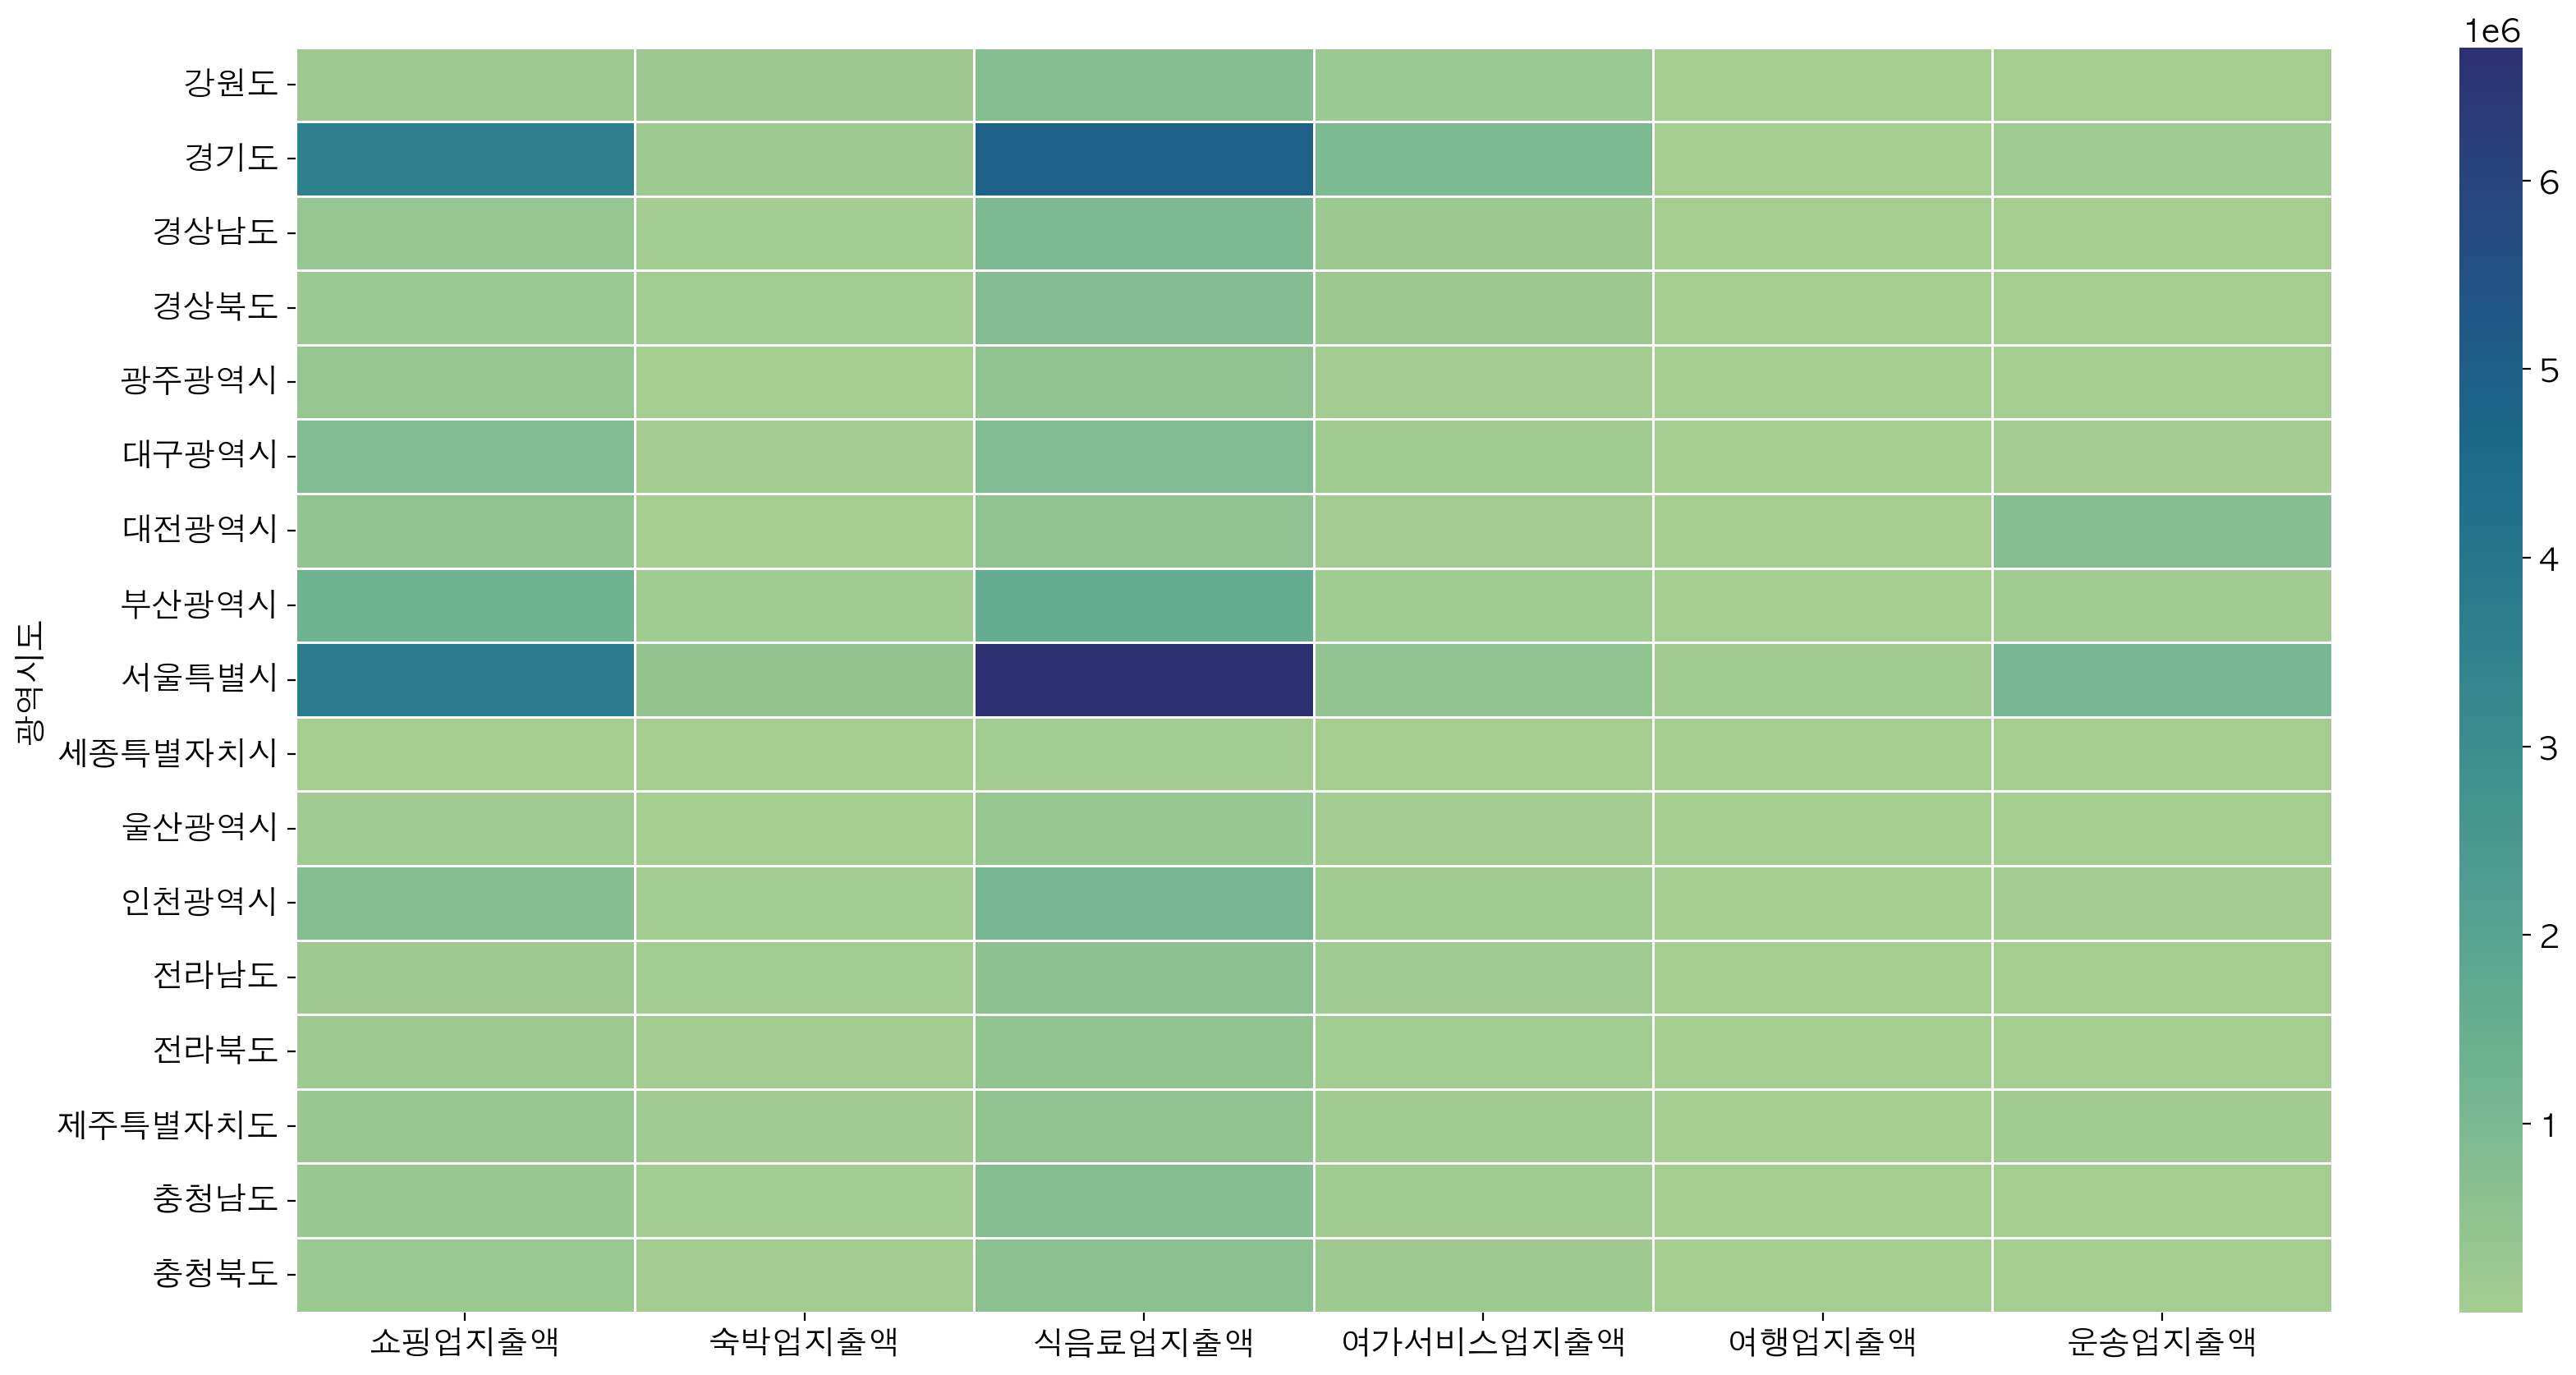

In [24]:
plt.figure(figsize=(20,10))
sb.heatmap(df_heat, annot=False, lw=0.5, cmap='crest')
plt.show()
plt.close()

### [3] 방문자수와 쇼핑업 지출액 관계

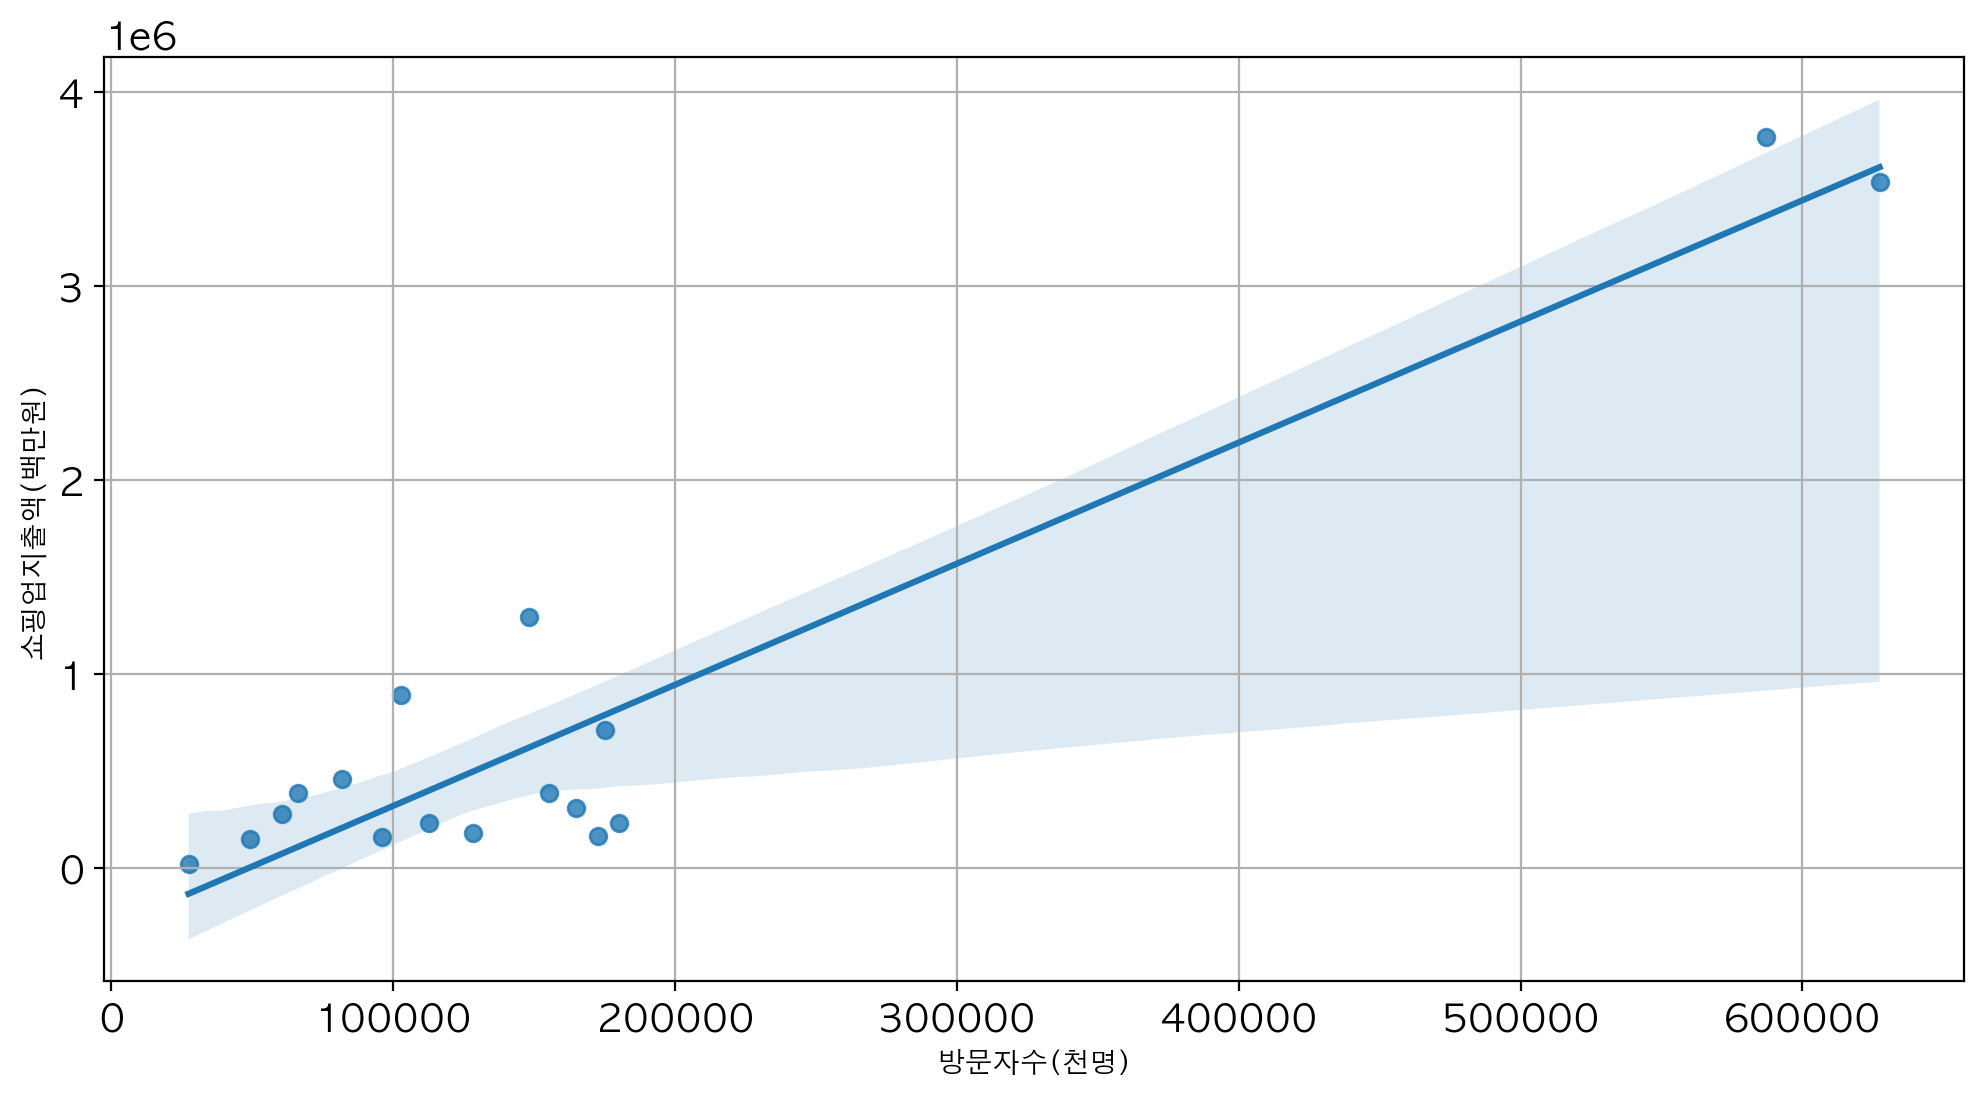

In [25]:
plt.figure()
sb.regplot(data=df2, x='방문자수', y='쇼핑업지출액')
#line_kws={'color': 'skyblue'}, scatter_kws={'color': 'blue'}
#plt.title('방문자수와 쇼핑업지출액 산점도')
plt.xlabel('방문자수(천명)', fontdict={'size':10})
plt.ylabel('쇼핑업지출액(백만원)', fontdict={'size':10})
#plt.legend()
plt.grid()
plt.show()
plt.close()

### [4] 내국인 쇼핑 특징

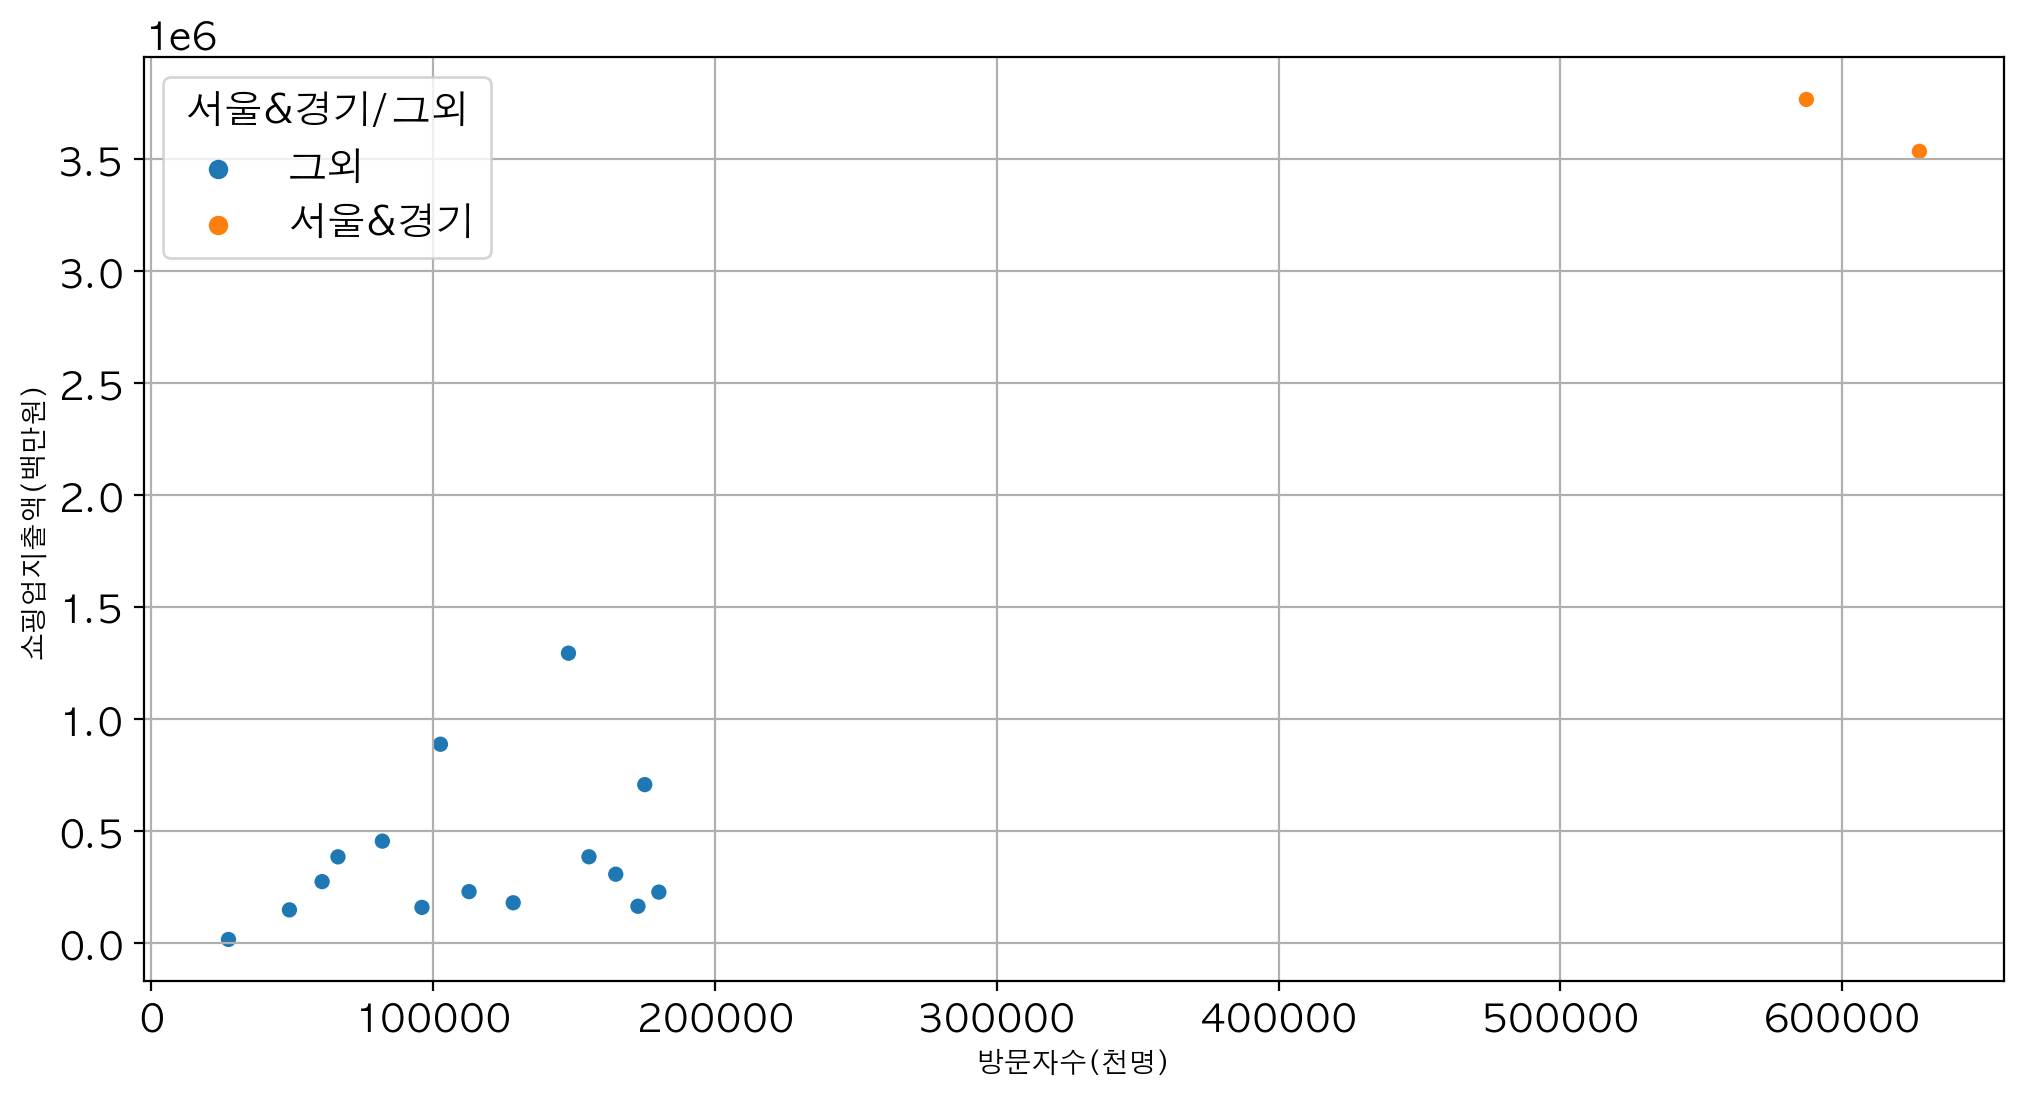

In [31]:
plt.figure()
#sb.kdeplot(data=df2, x='방문자수', y='쇼핑업지출액', hue='서울&경기/그외',level=2)
sb.scatterplot(data=df2, x='방문자수', y='쇼핑업지출액', hue='서울&경기/그외')
plt.xlabel('방문자수(천명)', fontdict={'size':10})
plt.ylabel('쇼핑업지출액(백만원)', fontdict={'size':10})
plt.grid()
plt.show()
plt.close()

In [ ]:
df_region = origin[['서울&경기/그외','쇼핑업지출액']].groupby('서울&경기/그외').sum()
df_region

,쇼핑업지출액
서울&경기/그외,
그외,5835101689
서울&경기,7304185845


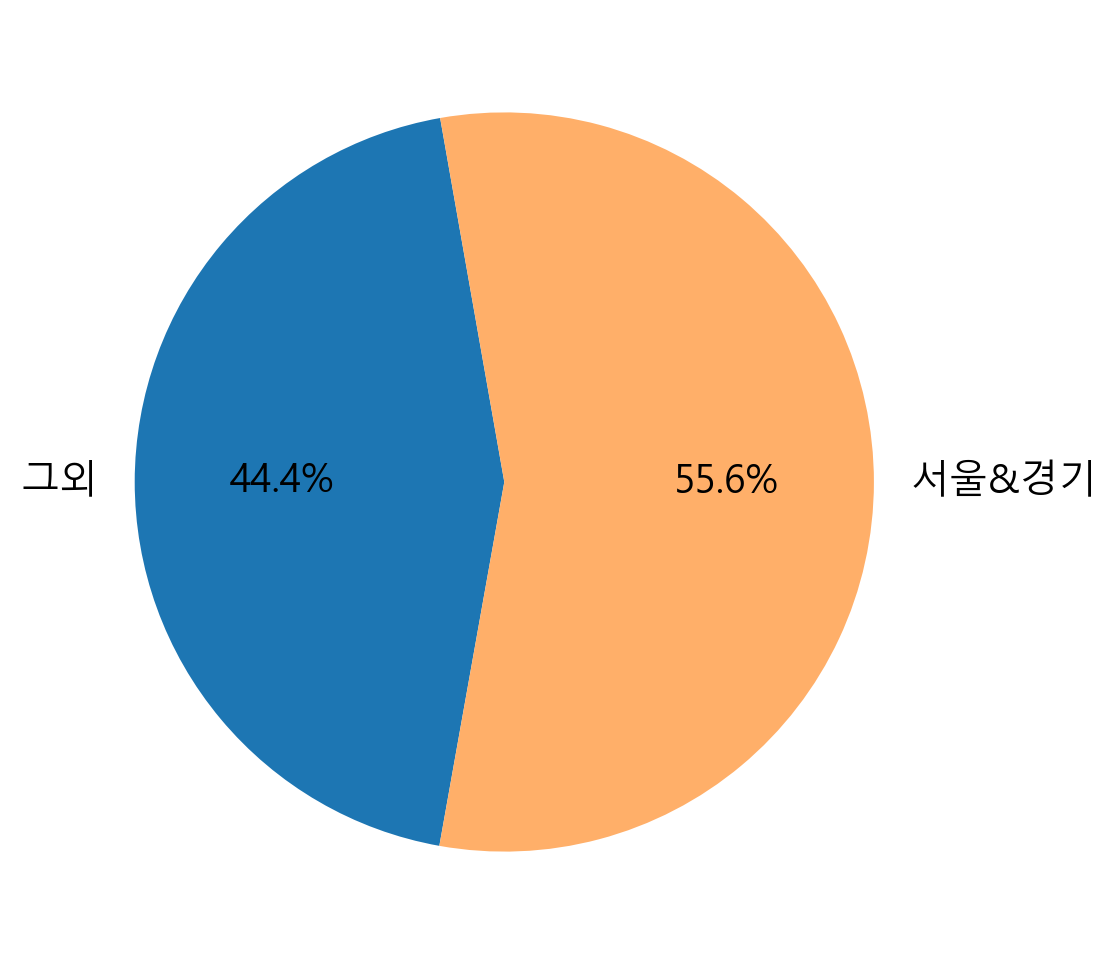

In [ ]:
# 내국인 지역별 쇼핑액 비중
df_region['쇼핑업지출액'].plot.pie(autopct='%0.1f%%', colors = ['#1d76b3', '#ffaf69'],
        explode = [0,0], startangle=100) 
plt.ylabel('')
plt.show()
plt.close()

## #04. 쇼핑업 세부 업종별 지출액 - 준비작업
### [1] 데이터 가져오기

In [ ]:
origin2 = read_excel("2023내국인쇼핑2.xlsx")
origin2.head()

,광역시도,내/외국인,서울&경기/그외,대분류,중분류,대분류 지출액,중분류 지출액
0,서울특별시,내국인,서울&경기,쇼핑업,면세점,3767923067,1.276294e+08
1,서울특별시,내국인,서울&경기,쇼핑업,관광기념품,3767923067,1.573181e+07
2,서울특별시,내국인,서울&경기,쇼핑업,레저용품쇼핑,3767923067,4.710455e+08
3,서울특별시,내국인,서울&경기,쇼핑업,대형쇼핑몰,3767923067,3.153516e+09
4,부산광역시,내국인,그외,쇼핑업,면세점,1295342025,2.727580e+07


## #05. 쇼핑업 세부 업종별 지출액 - 데이터 전처리(정제)
### [1] 결측치 확인 및 처리

In [ ]:
empty2 = origin2.isnull()
empty2.sum()

광역시도        0
내/외국인       0
서울&경기/그외    0
대분류         0
중분류         0
대분류 지출액     0
중분류 지출액     5
dtype: int64

In [ ]:
origin2 = origin2.fillna(value=0)

In [ ]:
empty2 = origin2.isnull()
empty2.sum()

광역시도        0
내/외국인       0
서울&경기/그외    0
대분류         0
중분류         0
대분류 지출액     0
중분류 지출액     0
dtype: int64

### [2] 지출액 > 백만원 단위로 변경

In [ ]:
df66 = origin2[['광역시도', '내/외국인', '서울&경기/그외', '대분류', '중분류']]

for i, v in enumerate(origin2.columns[5:]):
    df66[v] = origin2[v].divide(1000)

df66

C:\Users\kimyb\AppData\Local\Temp\ipykernel_16812\3176615306.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df66[v] = origin2[v].divide(1000)


,광역시도,내/외국인,서울&경기/그외,대분류,중분류,대분류 지출액,중분류 지출액
0,서울특별시,내국인,서울&경기,쇼핑업,면세점,3767923.067,127629.362
1,서울특별시,내국인,서울&경기,쇼핑업,관광기념품,3767923.067,15731.811
2,서울특별시,내국인,서울&경기,쇼핑업,레저용품쇼핑,3767923.067,471045.549
3,서울특별시,내국인,서울&경기,쇼핑업,대형쇼핑몰,3767923.067,3153516.344
4,부산광역시,내국인,그외,쇼핑업,면세점,1295342.025,27275.795
...,...,...,...,...,...,...,...
63,경상남도,내국인,그외,쇼핑업,면세점,386097.024,5.629
64,제주특별자치도,내국인,그외,쇼핑업,면세점,275238.002,166688.862
65,제주특별자치도,내국인,그외,쇼핑업,관광기념품,275238.002,33533.509
66,제주특별자치도,내국인,그외,쇼핑업,레저용품쇼핑,275238.002,41834.719


### [3] 데이터 타입 변경

In [ ]:
df66.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   광역시도      68 non-null     object 
 1   내/외국인     68 non-null     object 
 2   서울&경기/그외  68 non-null     object 
 3   대분류       68 non-null     object 
 4   중분류       68 non-null     object 
 5   대분류 지출액   68 non-null     float64
 6   중분류 지출액   68 non-null     float64
dtypes: float64(2), object(5)
memory usage: 3.8+ KB


In [ ]:
df66= df66.astype({'광역시도' : 'category', '내/외국인' : 'category', '서울&경기/그외' : 'category', '대분류' : 'category', '중분류' : 'category'})
df66.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   광역시도      68 non-null     category
 1   내/외국인     68 non-null     category
 2   서울&경기/그외  68 non-null     category
 3   대분류       68 non-null     category
 4   중분류       68 non-null     category
 5   대분류 지출액   68 non-null     float64 
 6   중분류 지출액   68 non-null     float64 
dtypes: category(5), float64(2)
memory usage: 2.7 KB


### [4] 기술통계량 확인

In [ ]:
df66.describe()

,대분류 지출액,중분류 지출액
count,6.800000e+01,6.800000e+01
mean,7.728993e+05,1.932248e+05
std,1.103771e+06,5.468514e+05
min,1.702359e+04,0.000000e+00
25%,1.807876e+05,1.803719e+03
50%,3.083020e+05,3.399341e+04
75%,7.083448e+05,1.123043e+05
max,3.767923e+06,3.153516e+06


## #06. 쇼핑업 세부 업종별 지출액 - 데이터 시각화
### [1] 지역별 특징

In [ ]:
df77 = df66[['서울&경기/그외','중분류', '중분류 지출액']].groupby(['서울&경기/그외','중분류'], as_index=False).sum()
df77

C:\Users\kimyb\AppData\Local\Temp\ipykernel_16812\1546365199.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df77 = df66[['서울&경기/그외','중분류', '중분류 지출액']].groupby(['서울&경기/그외','중분류'], as_index=False).sum()


,서울&경기/그외,중분류,중분류 지출액
0,그외,관광기념품,62722.578
1,그외,대형쇼핑몰,4286164.659
2,그외,레저용품쇼핑,1096402.765
3,그외,면세점,389811.684
4,서울&경기,관광기념품,26734.804
5,서울&경기,대형쇼핑몰,6221853.643
6,서울&경기,레저용품쇼핑,919004.334
7,서울&경기,면세점,136593.062


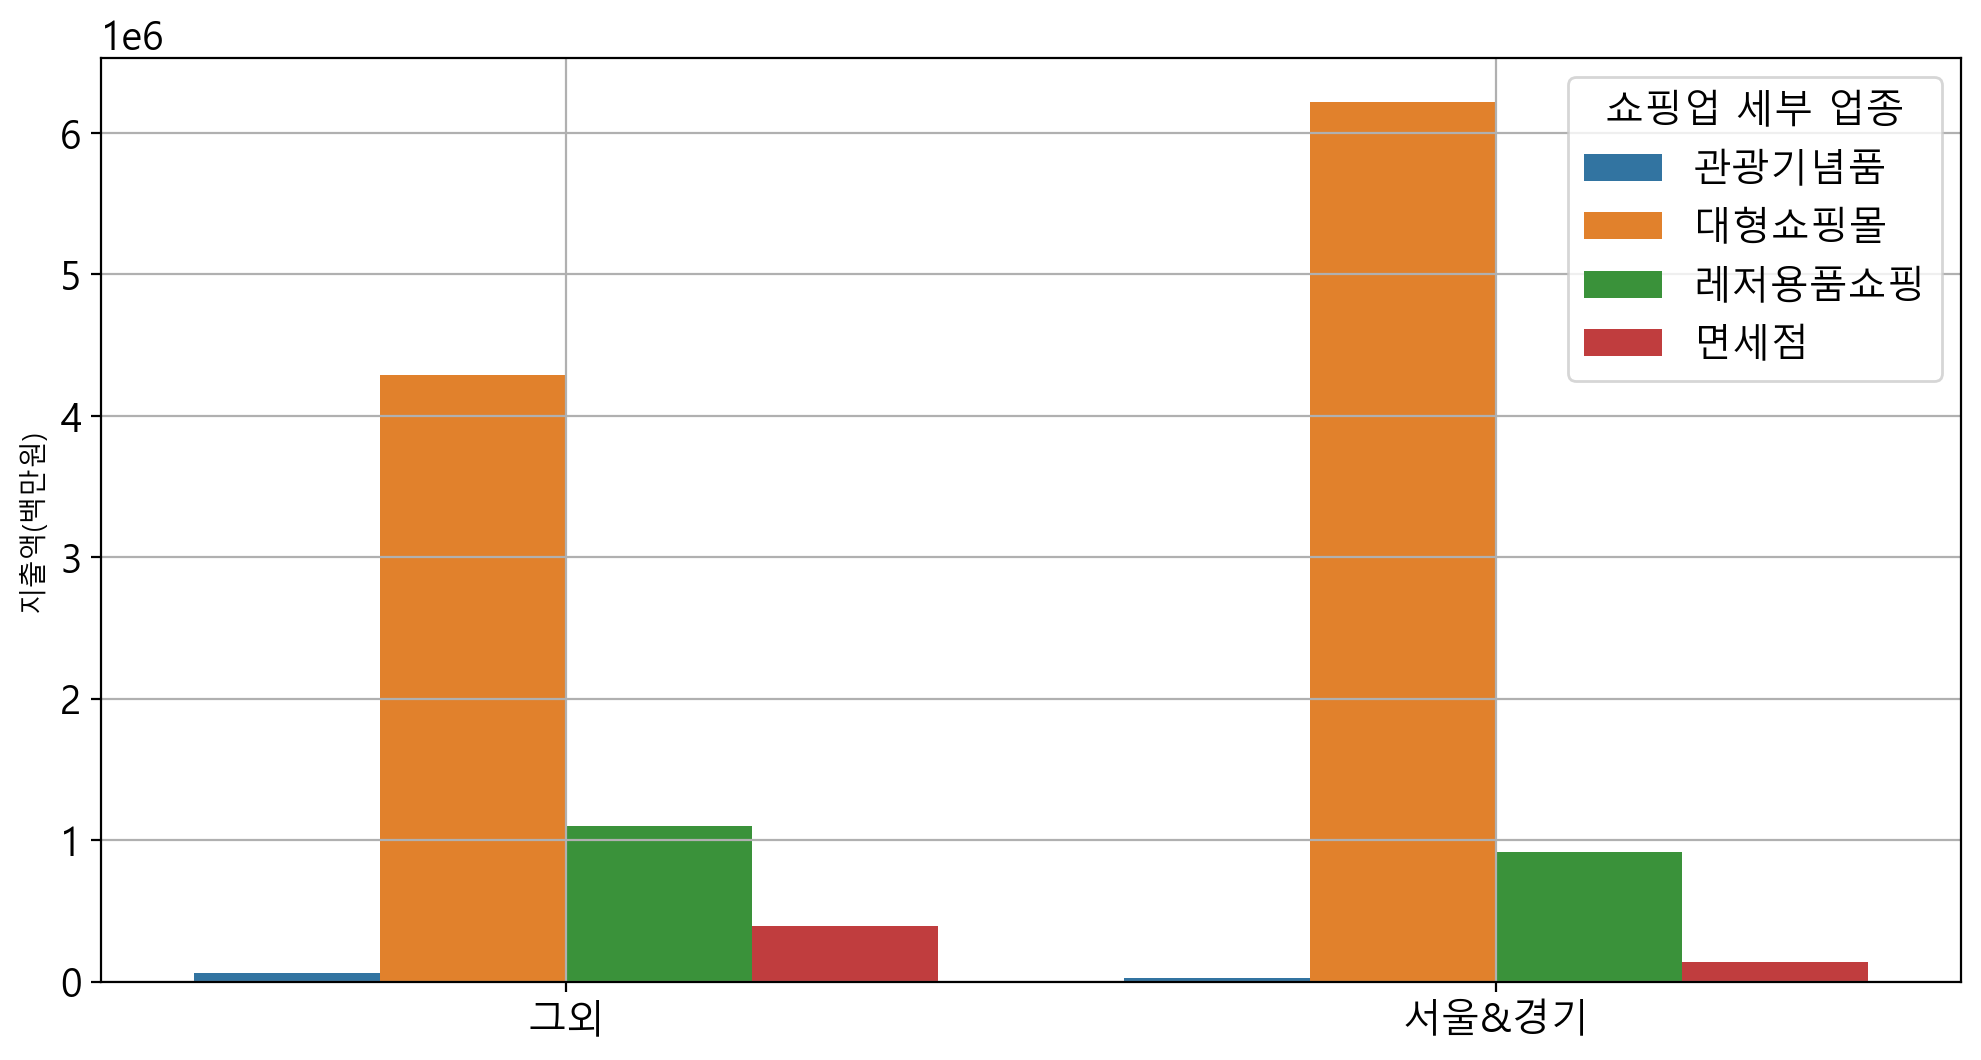

In [ ]:
plt.figure()
sb.barplot(data=df77, x= '서울&경기/그외', y = '중분류 지출액', hue= '중분류')
plt.grid()
plt.legend(title= '쇼핑업 세부 업종')
plt.ylabel('지출액(백만원)', fontdict={'size':10})
plt.xlabel('', fontdict={'size':10})
plt.show()
plt.close()

In [ ]:
df88 = df66[['광역시도', '중분류', '중분류 지출액']].groupby(['중분류','광역시도',], as_index=False).sum()
df88

C:\Users\kimyb\AppData\Local\Temp\ipykernel_16812\1778214061.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df88 = df66[['광역시도', '중분류', '중분류 지출액']].groupby(['중분류','광역시도',], as_index=False).sum()


,중분류,광역시도,중분류 지출액
0,관광기념품,강원도,3670.484
1,관광기념품,경기도,11002.993
2,관광기념품,경상남도,3764.919
3,관광기념품,경상북도,3521.367
4,관광기념품,광주광역시,1088.821
...,...,...,...
63,면세점,전라남도,361.599
64,면세점,전라북도,1.166
65,면세점,제주특별자치도,166688.862
66,면세점,충청남도,0.000


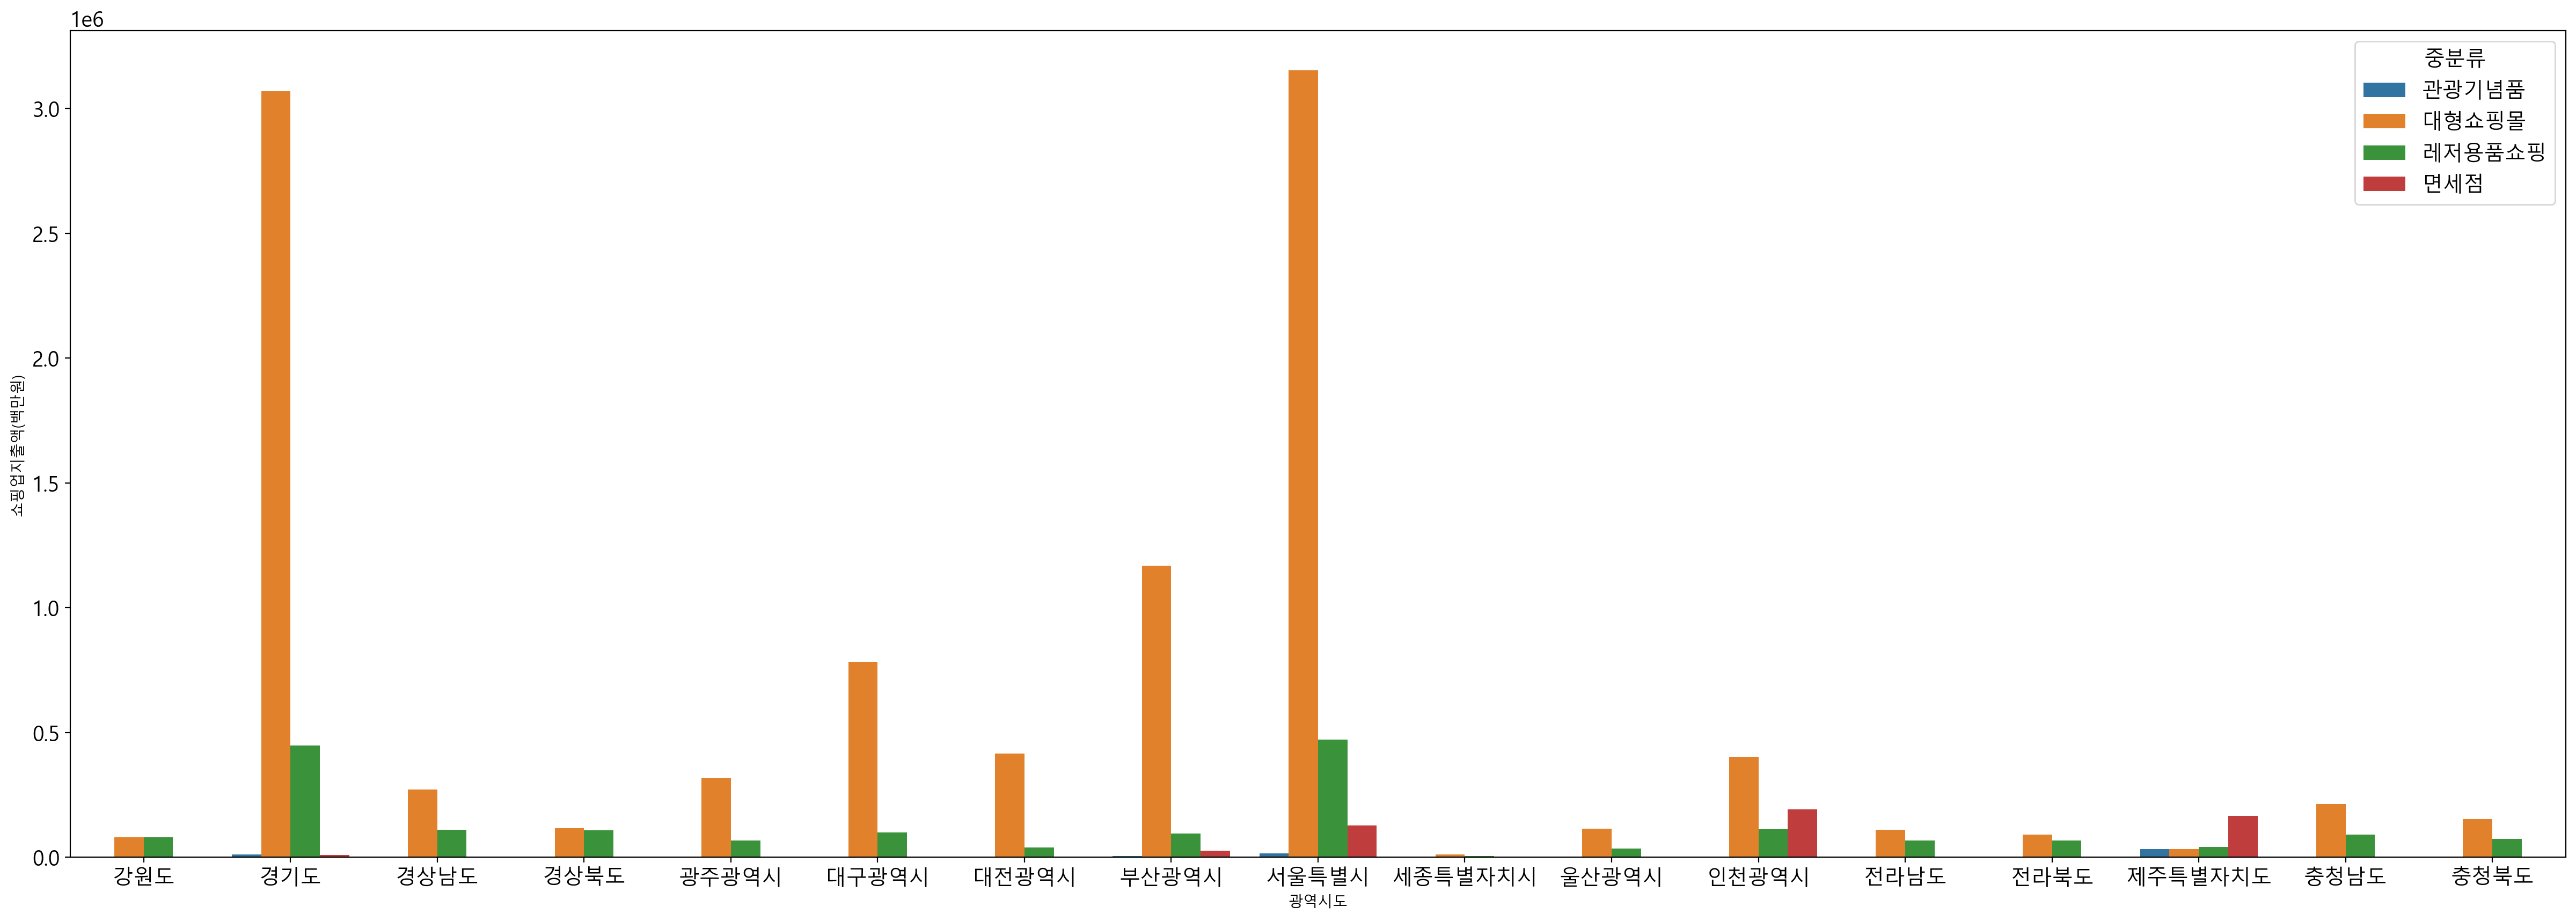

In [ ]:
plt.figure(figsize=(30,10))
sb.barplot(data=df88, x='광역시도', y='중분류 지출액', hue='중분류')
plt.xticks(rotation=0)
plt.xlabel('광역시도', fontdict={'size':10})
plt.ylabel('쇼핑업지출액(백만원)', fontdict={'size':10})
plt.show()
plt.close()